# Klasifikasi Daging Hewan Ternak Menggunakan CNN

# Baca Data

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
# Menentukan direktori dataset
dataset_dir = 'D:\materi matkul\semester 6\pcd\Projekan\data baru\dataset'

In [3]:
# Inisialisasi array untuk menyimpan gambar dan labelnya
images = []
labels = []

In [4]:
# Loop melalui direktori "Fresh"
fresh_dir = os.path.join(dataset_dir, 'Fresh')
for image_file in os.listdir(fresh_dir):
    if image_file.endswith('.jpg'):
        image = cv2.imread(os.path.join(fresh_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah ke format warna RGB
        images.append(image)
        labels.append('Fresh')


In [5]:
# Loop melalui direktori "Spoiled"
spoiled_dir = os.path.join(dataset_dir, 'Spoiled')
for image_file in os.listdir(spoiled_dir):
    if image_file.endswith('.jpg'):
        image = cv2.imread(os.path.join(spoiled_dir, image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah ke format warna RGB
        images.append(image)
        labels.append('Spoiled')

In [6]:
# Konversi menjadi array numpy
images = np.array(images)
labels = np.array(labels)

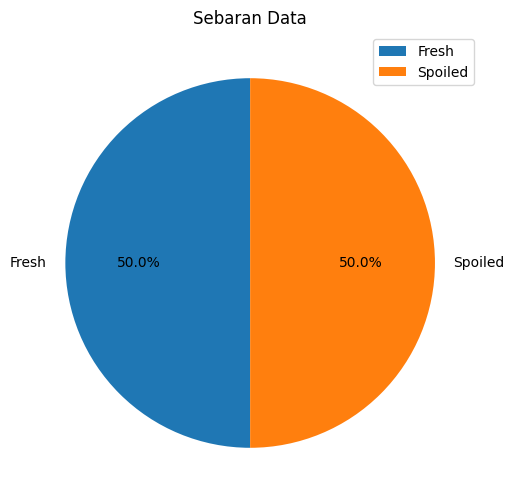

In [7]:
#untuk mengecek sebaran data
unique_labels, label_counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title('Sebaran Data')
plt.legend(loc='upper right')
plt.show()

In [7]:
# Bagi data menjadi data latih dan data uji
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Ubah dimensi data menjadi 1D (flatten)
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Normalisasi nilai piksel menjadi range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [8]:
augmented_test_images = []
augmented_test_labels = []

# Augmentasi data uji dengan flip vertikal dan flip horizontal
for i in range(len(test_images)):
    image = test_images[i]
    label = test_labels[i]

    # Flip vertikal
    flipped_vertical = cv2.flip(image, 0)
    flipped_vertical = np.reshape(flipped_vertical, (-1,))
    augmented_test_images.append(flipped_vertical)
    augmented_test_labels.append(label)

    # Flip horizontal
    flipped_horizontal = cv2.flip(image, 1)
    flipped_horizontal = np.reshape(flipped_horizontal, (-1,))
    augmented_test_images.append(flipped_horizontal)
    augmented_test_labels.append(label)

# Mengubah list menjadi array numpy
augmented_test_images = np.array(augmented_test_images)
augmented_test_labels = np.array(augmented_test_labels)

# Menggabungkan data asli dengan data yang telah di-augmentasi
augmented_images = np.concatenate((test_images, augmented_test_images))
augmented_labels = np.concatenate((test_labels, augmented_test_labels))

# Mengubah dimensi data menjadi 1D (flatten)
augmented_images = augmented_images.reshape(augmented_images.shape[0], -1)

# Normalisasi nilai piksel menjadi range 0-1
augmented_images = augmented_images / 255.0

In [12]:
augmented_test_images

array([[0.83529412, 0.89803922, 0.52941176, ..., 0.46666667, 0.47843137,
        0.44313725],
       [0.44313725, 0.47843137, 0.46666667, ..., 0.52941176, 0.89803922,
        0.83529412],
       [0.87843137, 0.92941176, 0.56862745, ..., 0.4627451 , 0.48235294,
        0.44705882],
       ...,
       [0.4627451 , 0.48627451, 0.47058824, ..., 0.50588235, 0.82352941,
        0.75686275],
       [0.84313725, 0.90588235, 0.50980392, ..., 0.4627451 , 0.48235294,
        0.44705882],
       [0.44705882, 0.48235294, 0.4627451 , ..., 0.50980392, 0.90588235,
        0.84313725]])

# Visualisasi Data

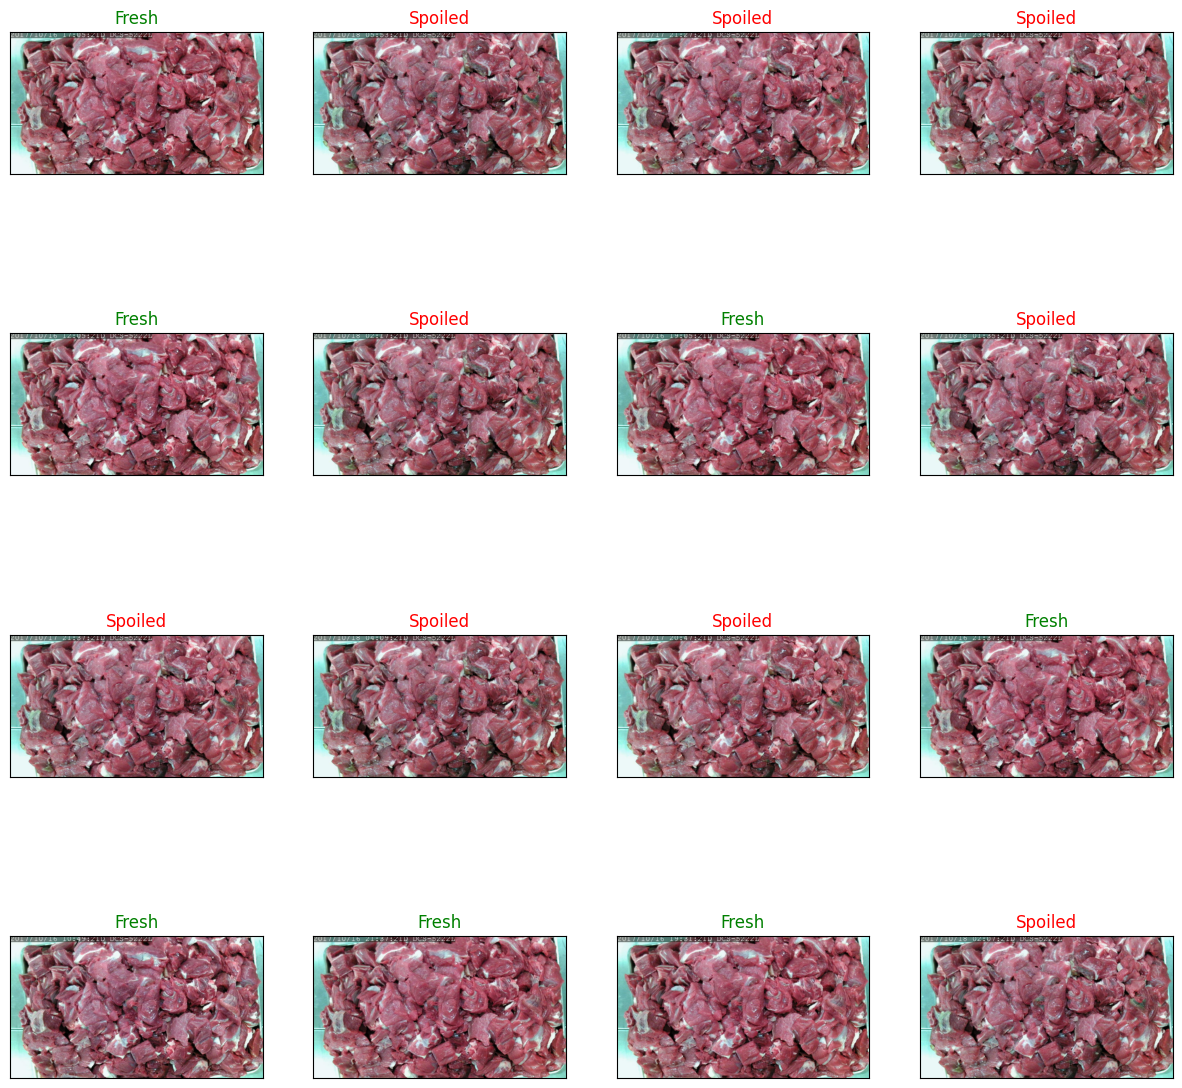

In [14]:
#Untuk menunjukan label pada data(Fresh dan Spoiled)
plt.figure(figsize=(15, 15))
for i in range(1, 17):
    fig = np.random.choice(np.arange(len(images)))
    plt.subplot(4, 4, i)
    plt.imshow(images[fig])
    if labels[fig] == 'Fresh':
        c = 'green'
    else:
        c = 'red'
    plt.title(labels[fig], color=c)
    plt.xticks([])
    plt.yticks([])
plt.show()

# Classification (KNN)

In [11]:
# Klasifikasi menggunakan K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_images, train_labels)

# Prediksi label menggunakan K-Nearest Neighbor
knn_predictions = knn.predict(test_images)

# Evaluasi akurasi K-Nearest Neighbor
knn_accuracy = np.mean(knn_predictions == test_labels)
print("Accuracy (K-Nearest Neighbor):", knn_accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Tentukan parameter yang akan dituning dan nilai yang mungkin untuk setiap parameter. Contohnya, kita akan menentukan parameter n_neighbors dan weights:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')
grid_search.fit(train_images, train_labels)

# Periksa parameter terbaik yang ditemukan:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Classification SVM

In [10]:
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM
svm_classifier = svm.SVC()

svm_classifier.fit(train_images, train_labels)
pred = svm_classifier.predict(test_images)
accuracy_score = accuracy_score(test_labels, pred)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 1.0


In [ ]:
# Melakukan cross-validation dengan 5 fold
scores = cross_val_score(svm_classifier, train_images, train_labels, cv=5)

# Menampilkan hasil akurasi setiap fold
for fold, score in enumerate(scores, start=1):
    print("Fold", fold, ":", score)

# Menampilkan rata-rata akurasi
print("Rata-rata akurasi:", np.mean(scores))

# Evaluasi akurasi model SVM pada data uji yang telah di-augmentasi
augmented_accuracy = np.mean(augmented_predictions == augmented_test_labels)
print("Accuracy (Support Vector Machine) - Test Data (Augmentasi):", augmented_accuracy)

# Prediksi label menggunakan model SVM
svm_predictions = svm_classifier.predict(test_images)